In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

In [ ]:
pip install numpy

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle

In [45]:
#pd.set_option('display.max_columns', 50)
#plt.style.use('bmh')
#color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
#color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [49]:
calendar = pd.read_csv('C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/calendar.csv')
price = pd.read_csv("C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/sell_prices.csv")
s_train = pd.read_csv("C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/sales_train_validation.csv")
sample = pd.read_csv("C:/Nanterre/Mémoire/USETHISFILE-m5-forecasting-accuracy-rawdata/sample_submission.csv")

In [52]:
d_cols = [c for c in s_train.columns if 'd_' in c]
print(d_cols)

['d_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', 'd_116', 'd_117', 'd_118', 'd_119', 'd_120', 'd_121', 'd_122', 'd_123', 

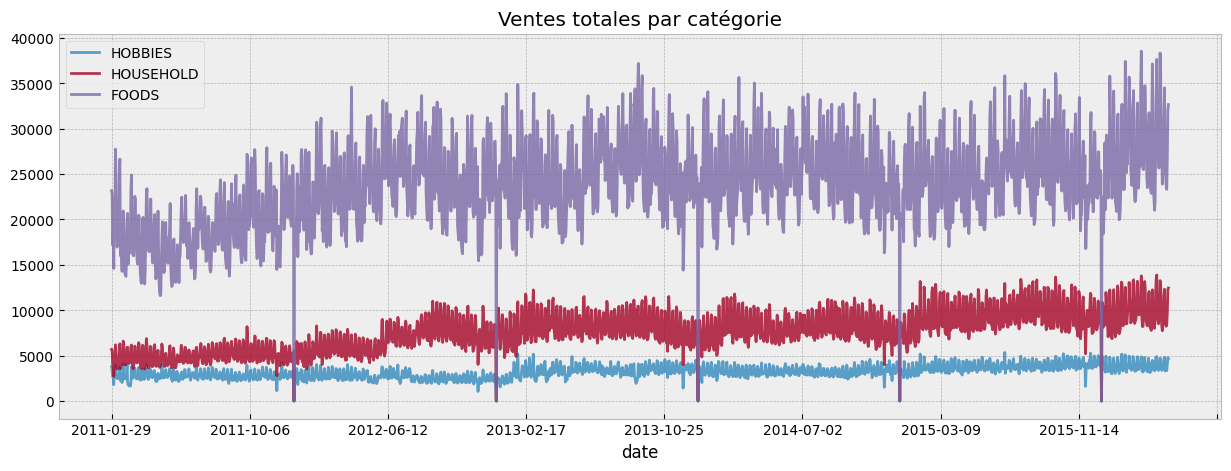

In [78]:
past_sales=s_train.set_index('id')[d_cols]\
.T\
.merge(calendar.set_index('d')['date'],
       left_index=True,
       right_index=True,
       validate='1:1')\
.set_index('date')
    
for i in s_train['cat_id'].unique():
    cat_col = [c for c in past_sales.columns if i in c]
    past_sales[cat_col]\
    .sum(axis=1)\
    .plot(figsize=(15,5),
          alpha=0.8,
          title='Ventes totales par catégorie')
plt.legend(s_train['cat_id'].unique())
plt.show()

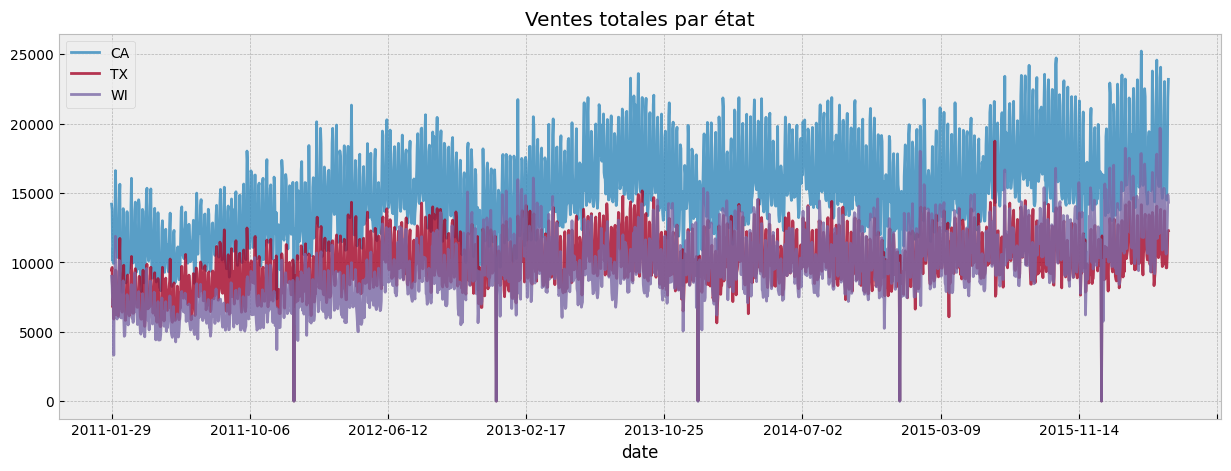

In [79]:
s_state = s_train['state_id'].unique()
for s in s_state:
    state_col = [c for c in past_sales.columns if s in c]
    past_sales[state_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Ventes totales par état')
plt.legend(s_state)
plt.show()

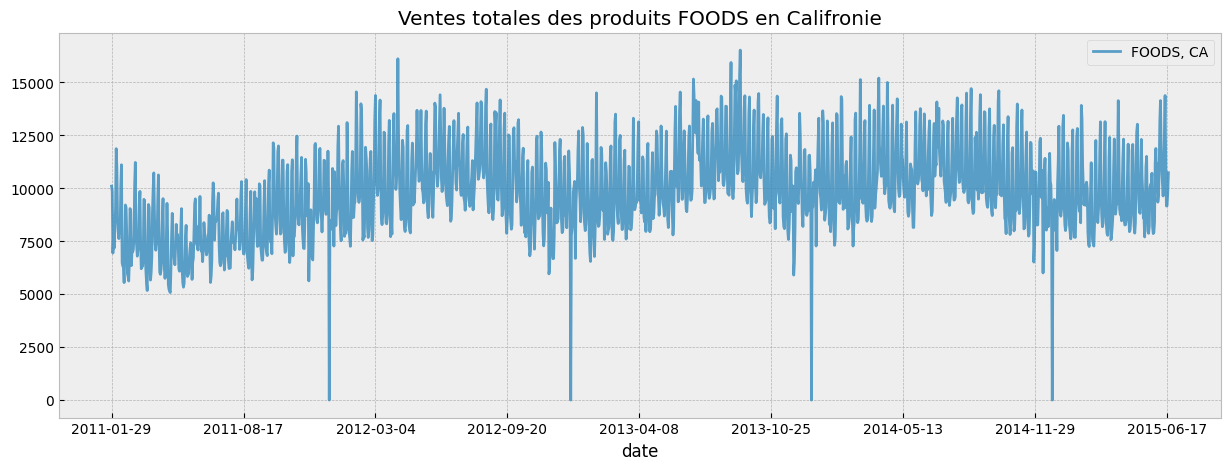

In [84]:
foods_ca = past_sales.loc['2011-01-29':'2015-06-19']

for cat_id in s_train['cat_id'].unique():
    for state_id in s_train['state_id'].unique():
        if cat_id == 'FOODS' and state_id == 'CA':
            items_col = [c for c in past_sales.columns if cat_id in c and state_id in c]
            if items_col:
                total_sales = foods_ca[items_col].sum(axis=1)
                total_sales.plot(figsize=(15, 5),
                                 alpha=0.8,
                                 title='Ventes totales des produits FOODS en Califronie')
plt.legend(['FOODS, CA'])
plt.show()

In [ ]:
#firstcommit